In [1]:
import numpy as np
import cv2
import time
import math
from os import listdir
from skimage import io
from skimage.filters import frangi
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from tabulate import tabulate

kernel = np.ones((3,3), np.uint8)

def pokaż(img, size=15, aspect=1):
    fig = plt.figure(figsize=(size,size))
    plt.imshow(img,cmap='gray', aspect=aspect)
    plt.show() 
    
def pokaż2(img1, img2, size=15, aspect=1):
    fig = plt.figure(figsize=(size,size))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1,cmap='gray', aspect=aspect)
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2,cmap='gray', aspect=aspect)
    plt.show()  
    
def policzWyniki(porównanie):
    return (np.sum(np.all(porównanie == (1, 1, 1), axis=2)), 
            np.sum(np.all(porównanie == (0, 0, 0), axis=2)), 
            np.sum(np.all(porównanie == (1, 0, 0), axis=2)), 
            np.sum(np.all(porównanie == (0, 1, 1), axis=2)))

In [2]:
lokalizacja = 'obrazy3'

In [3]:
start = time.time()
nazwyPlików = listdir(lokalizacja)

obrazyOrginalne = []
obrazyOdpowiedzi1 = []
obrazyOdpowiedzi2 = []

kanał = 1

for nazwa in nazwyPlików:
#     print("wczytywanie", len(obrazyOrginalne), nazwa)
    
    if nazwa.endswith("_1stHO.png"):
        obrazyOdpowiedzi1.append(io.imread(lokalizacja+"/"+nazwa)/255)
    elif nazwa.endswith("_2ndHO.png"):
        obrazyOdpowiedzi2.append(io.imread(lokalizacja+"/"+nazwa)/255)
    else:
        obrazyOrginalne.append(io.imread(lokalizacja+"/"+nazwa))
        
        
obrazy = []
obrazyWielkości = []
obrazyOdpowiedzi3 = []
for i in range(0, len(obrazyOrginalne)):
    obrazy.append(np.copy(obrazyOrginalne[i]))
    obrazyWielkości.append(np.shape(obrazyOrginalne[i]))
    obrazyOdpowiedzi3.append((obrazyOdpowiedzi1[i] + obrazyOdpowiedzi2[i])/2)

end = time.time()
print("Koniec, czas wykonania", round(end - start, 2), "sekund")

Koniec, czas wykonania 1.27 sekund


obraz 1 / 10


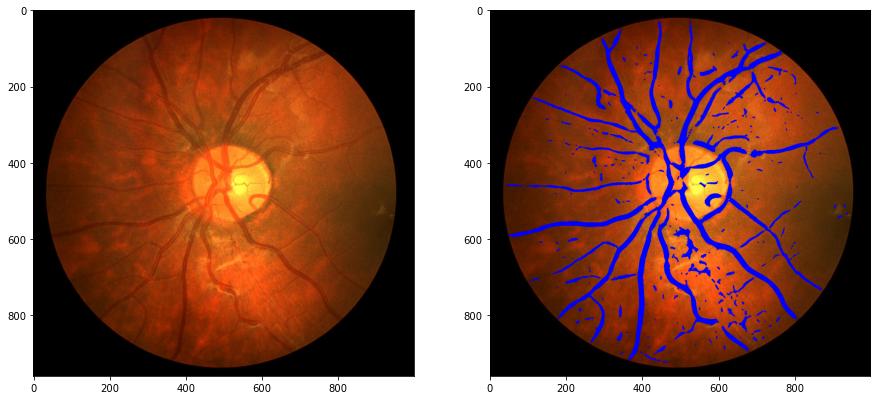

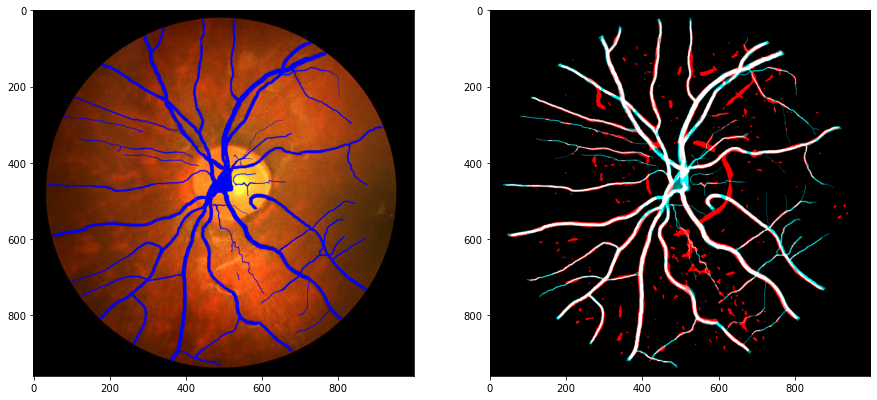

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 49083              │ 13975     │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 35823              │ 860159    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 94.81 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 77.84 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 96.0 %    │                    │           │
├─────────────────────┼───────────

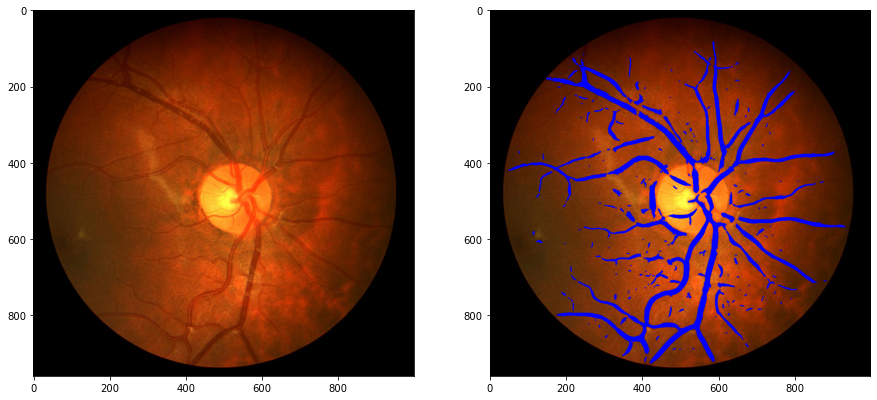

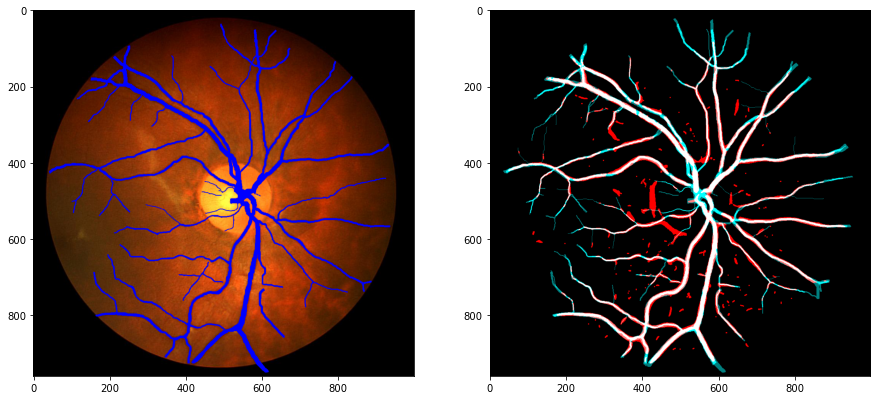

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 45713              │ 15105     │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 30301              │ 867921    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 95.27 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 75.16 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 96.63 %   │                    │           │
├─────────────────────┼───────────

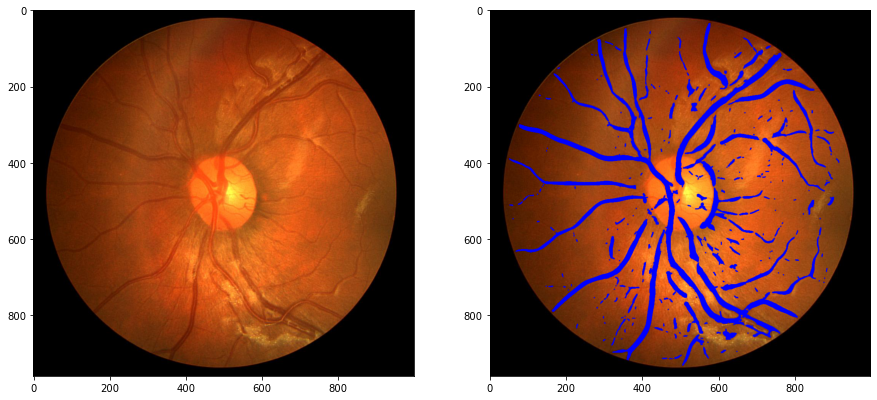

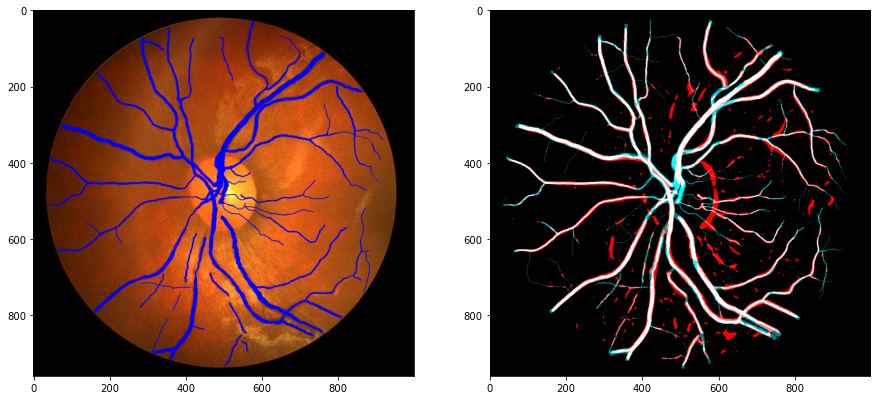

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 48116              │ 10876     │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 41818              │ 858230    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 94.51 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 81.56 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 95.35 %   │                    │           │
├─────────────────────┼───────────

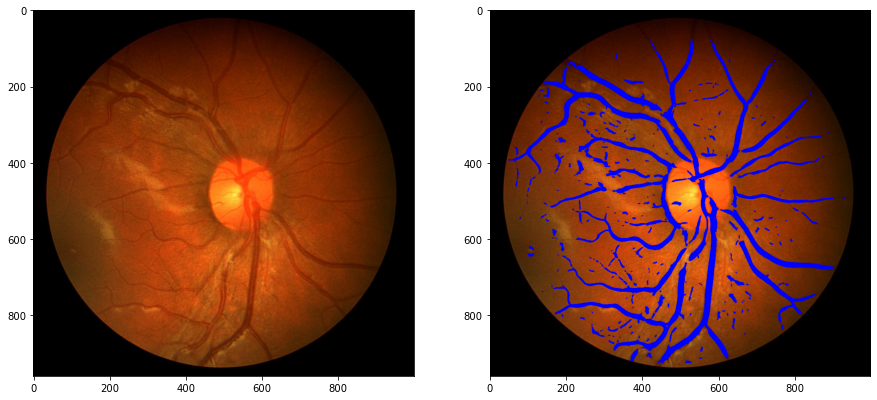

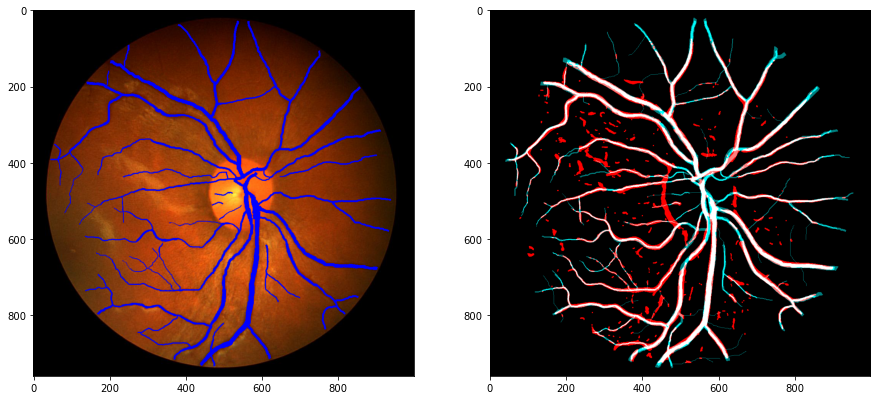

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 47524              │ 12697     │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 44703              │ 854116    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 94.01 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 78.92 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 95.03 %   │                    │           │
├─────────────────────┼───────────

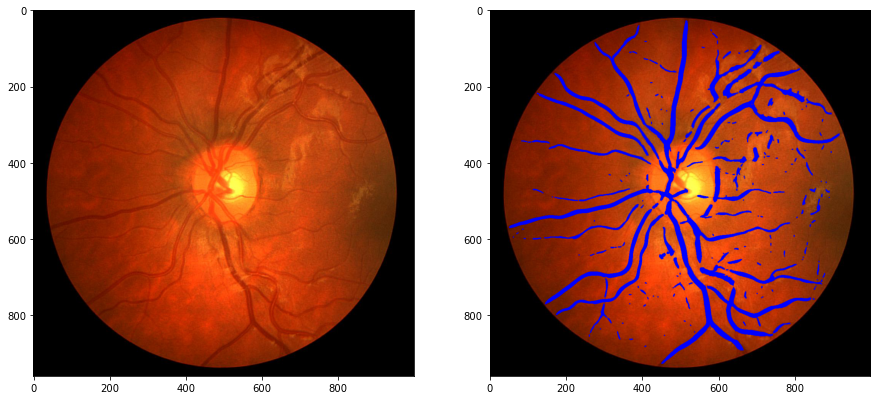

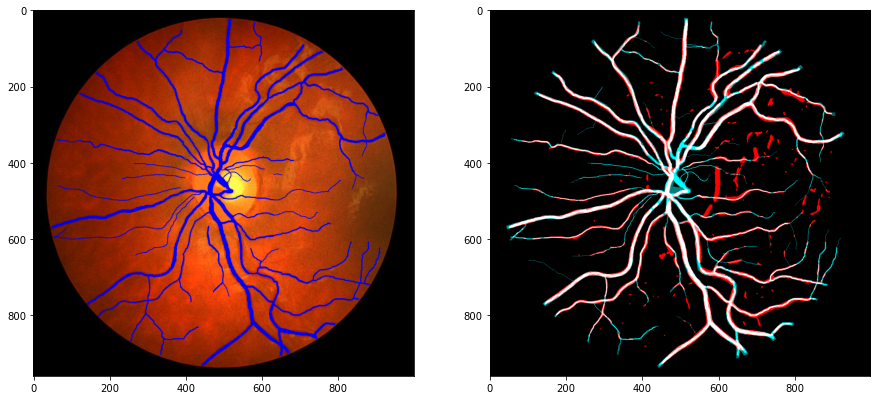

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 45543              │ 12127     │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 39116              │ 862254    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 94.66 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 78.97 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 95.66 %   │                    │           │
├─────────────────────┼───────────

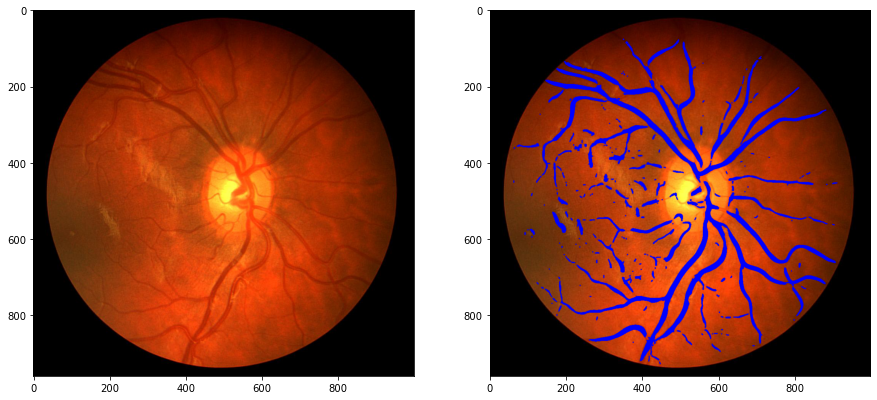

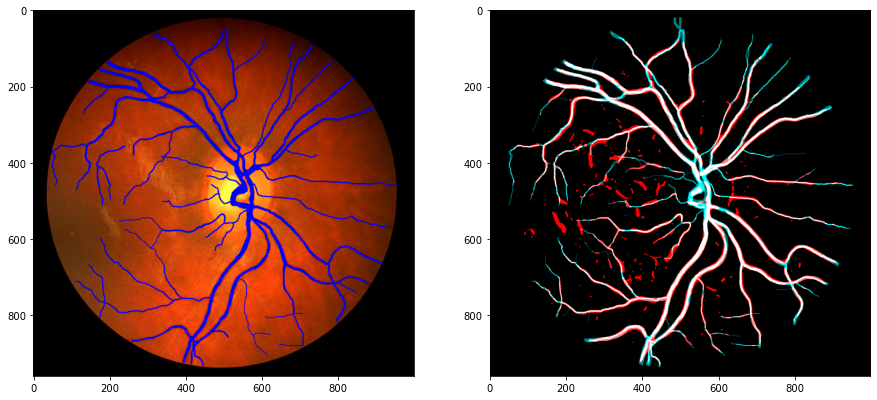

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 43783              │ 13276     │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 37039              │ 864942    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 94.75 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 76.73 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 95.89 %   │                    │           │
├─────────────────────┼───────────

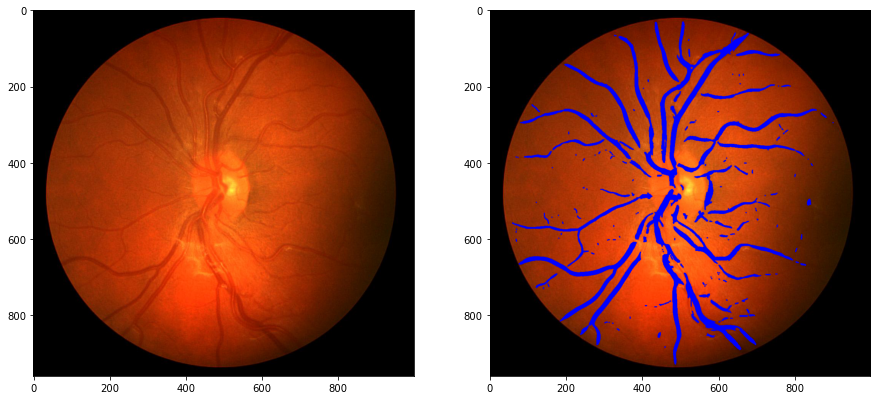

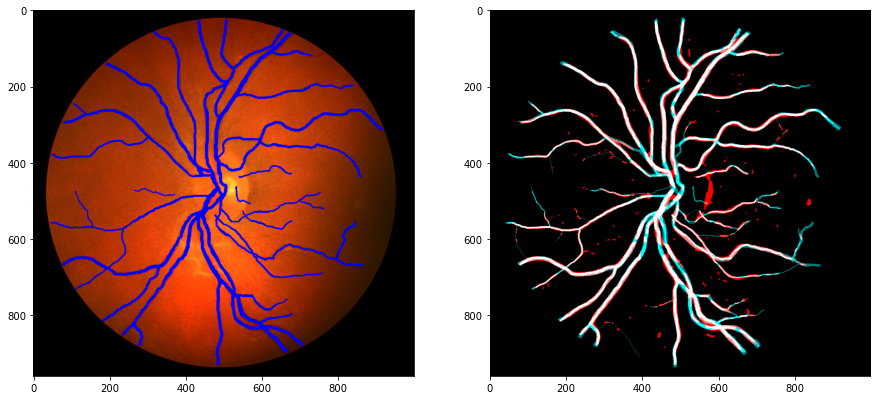

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 49386              │ 15680     │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 27565              │ 866409    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 95.49 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 75.9 %    │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 96.92 %   │                    │           │
├─────────────────────┼───────────

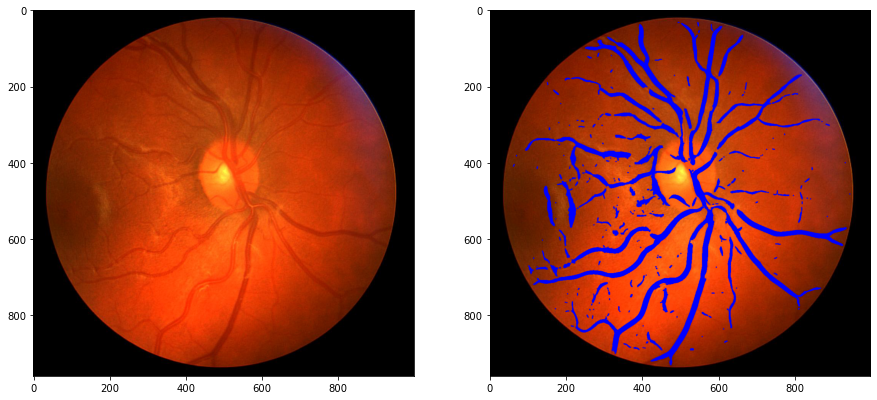

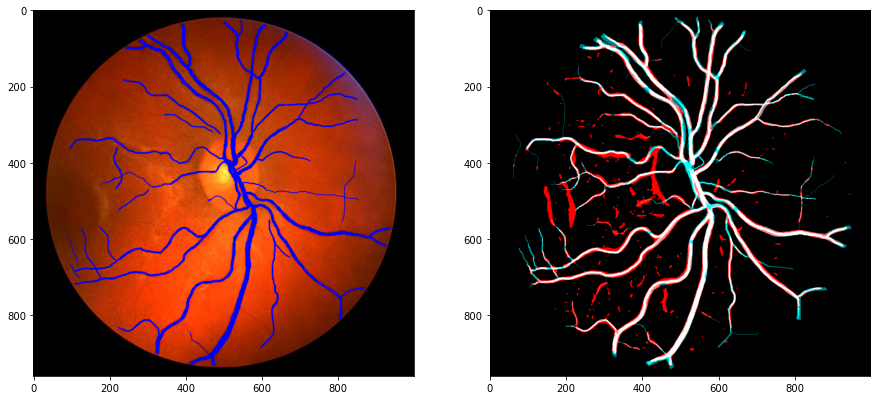

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 44961              │ 9066      │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 42953              │ 862060    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 94.58 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 83.22 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 95.25 %   │                    │           │
├─────────────────────┼───────────

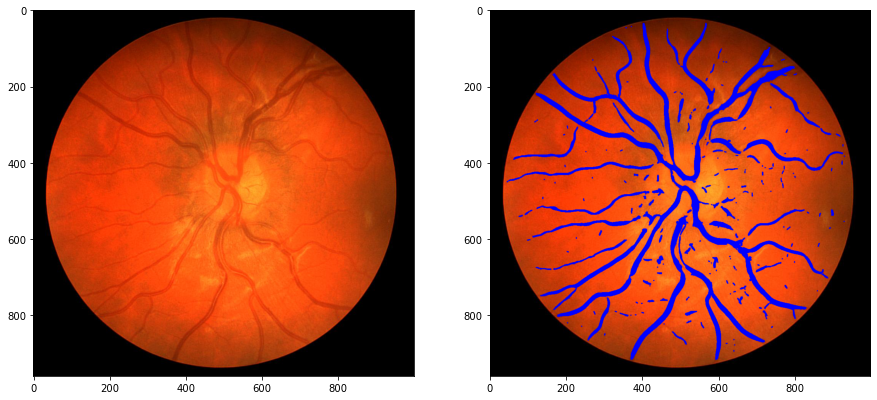

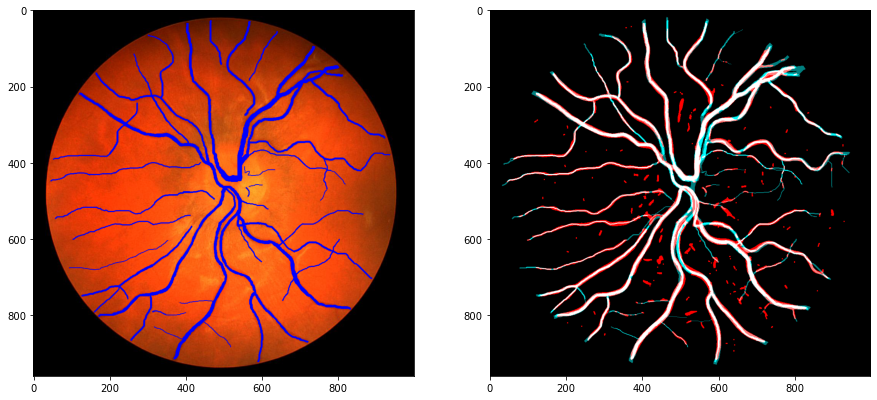

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 49339              │ 9395      │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 39566              │ 860740    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 94.89 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 84.0 %    │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 95.61 %   │                    │           │
├─────────────────────┼───────────

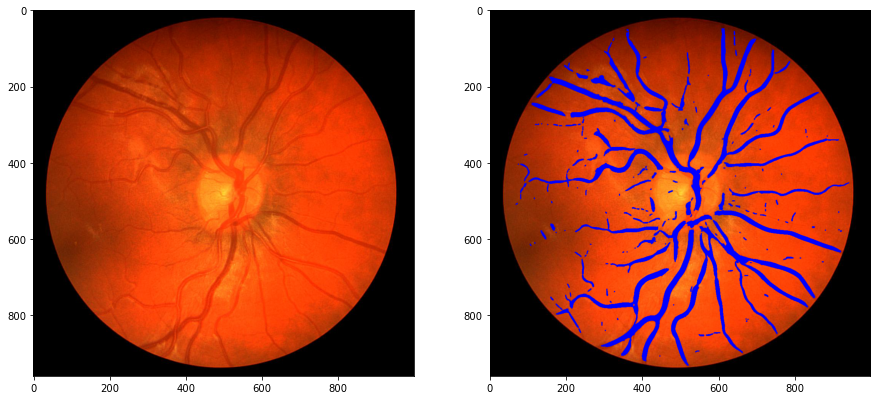

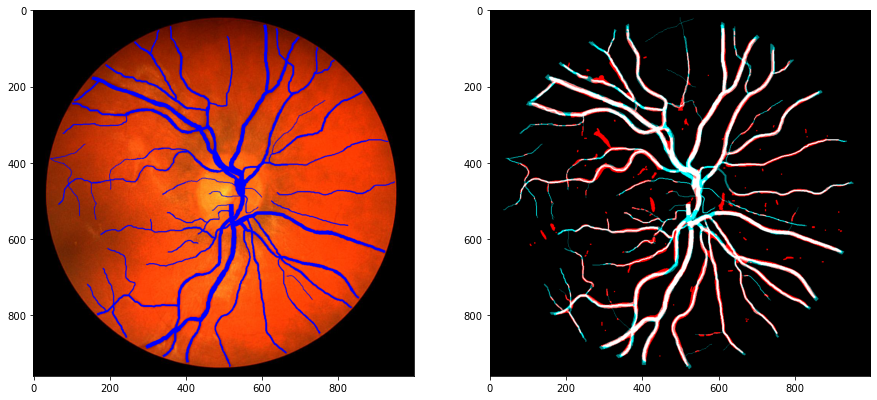

╒═════════════════════╤═══════════╤════════════════════╤═══════════╕
│                     │           │ Klasa predykatywna │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │           │ Pozytywna          │ Negatywna │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Klasa rzeczywista   │ Pozytywna │ 52985              │ 12477     │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│                     │ Negatywna │ 35737              │ 857841    │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Trafność            │ 94.97 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Czułość             │ 80.94 %   │                    │           │
├─────────────────────┼───────────┼────────────────────┼───────────┤
│ Swoistość           │ 96.0 %    │                    │           │
├─────────────────────┼───────────

In [4]:
ilośćObrazów = 10
for i in range(0, ilośćObrazów):

    #wybieranie tylko zielonego kanału
    obr = obrazy[i][:, :, 1]

    #wyostrzanie koloru - wyrówanie histogramu
    clahe1 = cv2.createCLAHE(clipLimit = 8, tileGridSize = (28,28))
    wyostrzony = clahe1.apply(obr)
    
    #zciemnienie 50% najjaśniejszych pikseli
    próg = np.max(wyostrzony)*0.50
    wyostrzony[wyostrzony > próg] = próg
    
    #właściwy algorytm wykrywania linii - filtr Frangi’ego
    wyliczony = frangi(wyostrzony)
    
    #progowanie wartości filtra Frangi’ego
    próg = np.max(wyliczony)/15
    wyliczony[wyliczony > próg] = 1
    wyliczony[wyliczony < próg] = 0
    
    #usuwanie krawędzi koła
    koło = np.copy(obr)
    koło[koło>10] = 10
    koło[koło<10] = 0
    wyliczony[koło==0] = 0
    
    #usuwanie małych obiektów
    iteracje = 1
    wyliczonyPoprawiony = cv2.erode(wyliczony, kernel, iterations=iteracje)
    wyliczonyPoprawiony = cv2.dilate(wyliczonyPoprawiony, kernel, iterations=iteracje)
    
    #porównywanie wyniku do poprawnych odpowiedzi
    porównanie1 = np.dstack((wyliczonyPoprawiony, obrazyOdpowiedzi1[i], obrazyOdpowiedzi1[i]))
    porównanie2 = np.dstack((wyliczonyPoprawiony, obrazyOdpowiedzi2[i], obrazyOdpowiedzi2[i]))
    porównanieRazem = np.dstack((wyliczonyPoprawiony, obrazyOdpowiedzi3[i], obrazyOdpowiedzi3[i]))
    
    #wyświetlanie wyniku
    print("obraz", i+1, "/", ilośćObrazów)
    
    #wyświetlanie wyniku - obrazy
    wynik = np.copy(obrazyOrginalne[i])
    wynik[wyliczonyPoprawiony>0] = (0, 0, 255)
    poprawne = np.copy(obrazyOrginalne[i])
    poprawne[obrazyOdpowiedzi2[i]>0] = (0, 0, 255)
    rozmiar = 15
    pokaż2(obrazyOrginalne[i], wynik, rozmiar)
    pokaż2(poprawne, porównanieRazem, rozmiar)
#     pokaż(obrazyOrginalne[i], rozmiar)
#     pokaż(wynik, rozmiar)
#     pokaż(poprawne, rozmiar)
#     pokaż(porównanieRazem, rozmiar)

    #wyświetlanie wyniku - tabela
    białe, czarne, czerwone, niebieskie = policzWyniki(porównanie2)
    razem = białe + czarne + czerwone + niebieskie
    table = [['', '', 'Klasa predykatywna', ''], 
             ['', '', 'Pozytywna', 'Negatywna'], 
             ['Klasa rzeczywista', 'Pozytywna', białe, niebieskie], 
             ['', 'Negatywna', czerwone, czarne],
             ['Trafność', str(round(100*(białe+czarne)/razem,2)) + ' %', '', ''],
             ['Czułość', str(round(100*białe/(białe+niebieskie),2)) + ' %', '', ''],
             ['Swoistość', str(round(100*czarne/(czarne+czerwone),2)) + ' %', '', ''],
             ['Średnia Czuł/Swoist', str(round(50*(białe/(białe+niebieskie)+czarne/(czarne+czerwone)),2)) + ' %', '', '']]
    print(tabulate(table, tablefmt='fancy_grid'))
